In [1]:
from modeloMultiplo import MRLM
import pandas as pd

In [2]:
df = pd.read_csv("salarios_profissionais.csv")
df

,experiencia,idade,grau_educacional,setor,regiao,carga_horaria,tamanho_empresa,dominio_tecnologico,salario
0,7.2,38.456736,Fundamental,Privado,Centro-Oeste,38.2,353,6.5,7048.276978
1,8.8,42.733218,Superior,Privado,Centro-Oeste,37.2,672,3.9,6431.520995
2,17.8,58.837863,Superior,Privado,Sudeste,45.3,543,5.0,10304.648021
3,10.4,46.950805,Pós-Graduação,Privado,Sudeste,35.3,861,6.1,9180.055817
4,10.6,46.705667,Pós-Graduação,Autônomo,Sul,35.1,543,6.3,10350.335537
...,...,...,...,...,...,...,...,...,...
938,8.9,43.778939,Pós-Graduação,Público,Norte,45.3,552,2.0,6995.752736
939,16.8,58.488004,Superior,Privado,Centro-Oeste,37.4,453,8.9,10980.804095
940,15.2,55.435095,Pós-Graduação,Privado,Sul,41.7,957,6.9,10389.937439
941,8.2,43.331439,Superior,Público,Nordeste,41.3,539,6.5,8548.487911


In [3]:
df["regiao"].unique()
# df["estacao"] = df["estacao"].replace(estacao_dict)
# df["tipo_destino"] = df["tipo_destino"].replace(tipo_destino_dict)

grau_educacional_ref = ["", "Fundamental", "Médio", "Superior", "Pós-Graduação"]
grau_educacional_dict = {}
for i, ref in enumerate(grau_educacional_ref):
    grau_educacional_dict[ref] = i
df["grau_educacional"] = df["grau_educacional"].replace(grau_educacional_dict)

setor_ref = ['', 'Privado', 'Autônomo', 'Público']
setor_dict = {}
for i, ref in enumerate(setor_ref):
    setor_dict[ref] = i
df["setor"] = df["setor"].replace(setor_dict)

regiao_ref = ['', 'Centro-Oeste', 'Sudeste', 'Sul', 'Nordeste', 'Norte']
regiao_dict = {}
for i, ref in enumerate(regiao_ref):
    regiao_dict[ref] = i
df["regiao"] = df["regiao"].replace(regiao_dict)

C:\Users\Joseff\AppData\Local\Temp\ipykernel_14348\1053055038.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["grau_educacional"] = df["grau_educacional"].replace(grau_educacional_dict)
C:\Users\Joseff\AppData\Local\Temp\ipykernel_14348\1053055038.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["setor"] = df["setor"].replace(setor_dict)
C:\Users\Joseff\AppData\Local\Temp\ipykernel_14348\1053055038.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain

In [4]:
# estacao_ref = ["", "Baixa", "Media", "Alta"]
# estacao_dict = {}
# for i, ref in enumerate(estacao_ref):
#     estacao_dict[ref] = i
# df["estacao"] = df["estacao"].replace(estacao_dict)

# tipo_destino_ref = ['', 'Praia', 'Urbano', 'Campo', 'Cultural']
# tipo_destino_dict = {}
# for i, ref in enumerate(tipo_destino_ref):
#     tipo_destino_dict[ref] = i
# df["tipo_destino"] = df["tipo_destino"].replace(tipo_destino_dict)

In [5]:
df

,experiencia,idade,grau_educacional,setor,regiao,carga_horaria,tamanho_empresa,dominio_tecnologico,salario
0,7.2,38.456736,1,1,1,38.2,353,6.5,7048.276978
1,8.8,42.733218,3,1,1,37.2,672,3.9,6431.520995
2,17.8,58.837863,3,1,2,45.3,543,5.0,10304.648021
3,10.4,46.950805,4,1,2,35.3,861,6.1,9180.055817
4,10.6,46.705667,4,2,3,35.1,543,6.3,10350.335537
...,...,...,...,...,...,...,...,...,...
938,8.9,43.778939,4,3,5,45.3,552,2.0,6995.752736
939,16.8,58.488004,3,1,1,37.4,453,8.9,10980.804095
940,15.2,55.435095,4,1,3,41.7,957,6.9,10389.937439
941,8.2,43.331439,3,3,4,41.3,539,6.5,8548.487911


In [6]:
y_label = "salario"

y = df[y_label]
X = df.drop(columns=y_label)

In [7]:
modelo = MRLM(X, y, X.columns.to_list(), y.name)

In [8]:
modelo.sumario_sm()

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     497.2
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:26:59   Log-Likelihood:                -7635.3
No. Observations:                 913   AIC:                         1.529e+04
Df Residuals:                     904   BIC:                         1.533e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -797.2834    

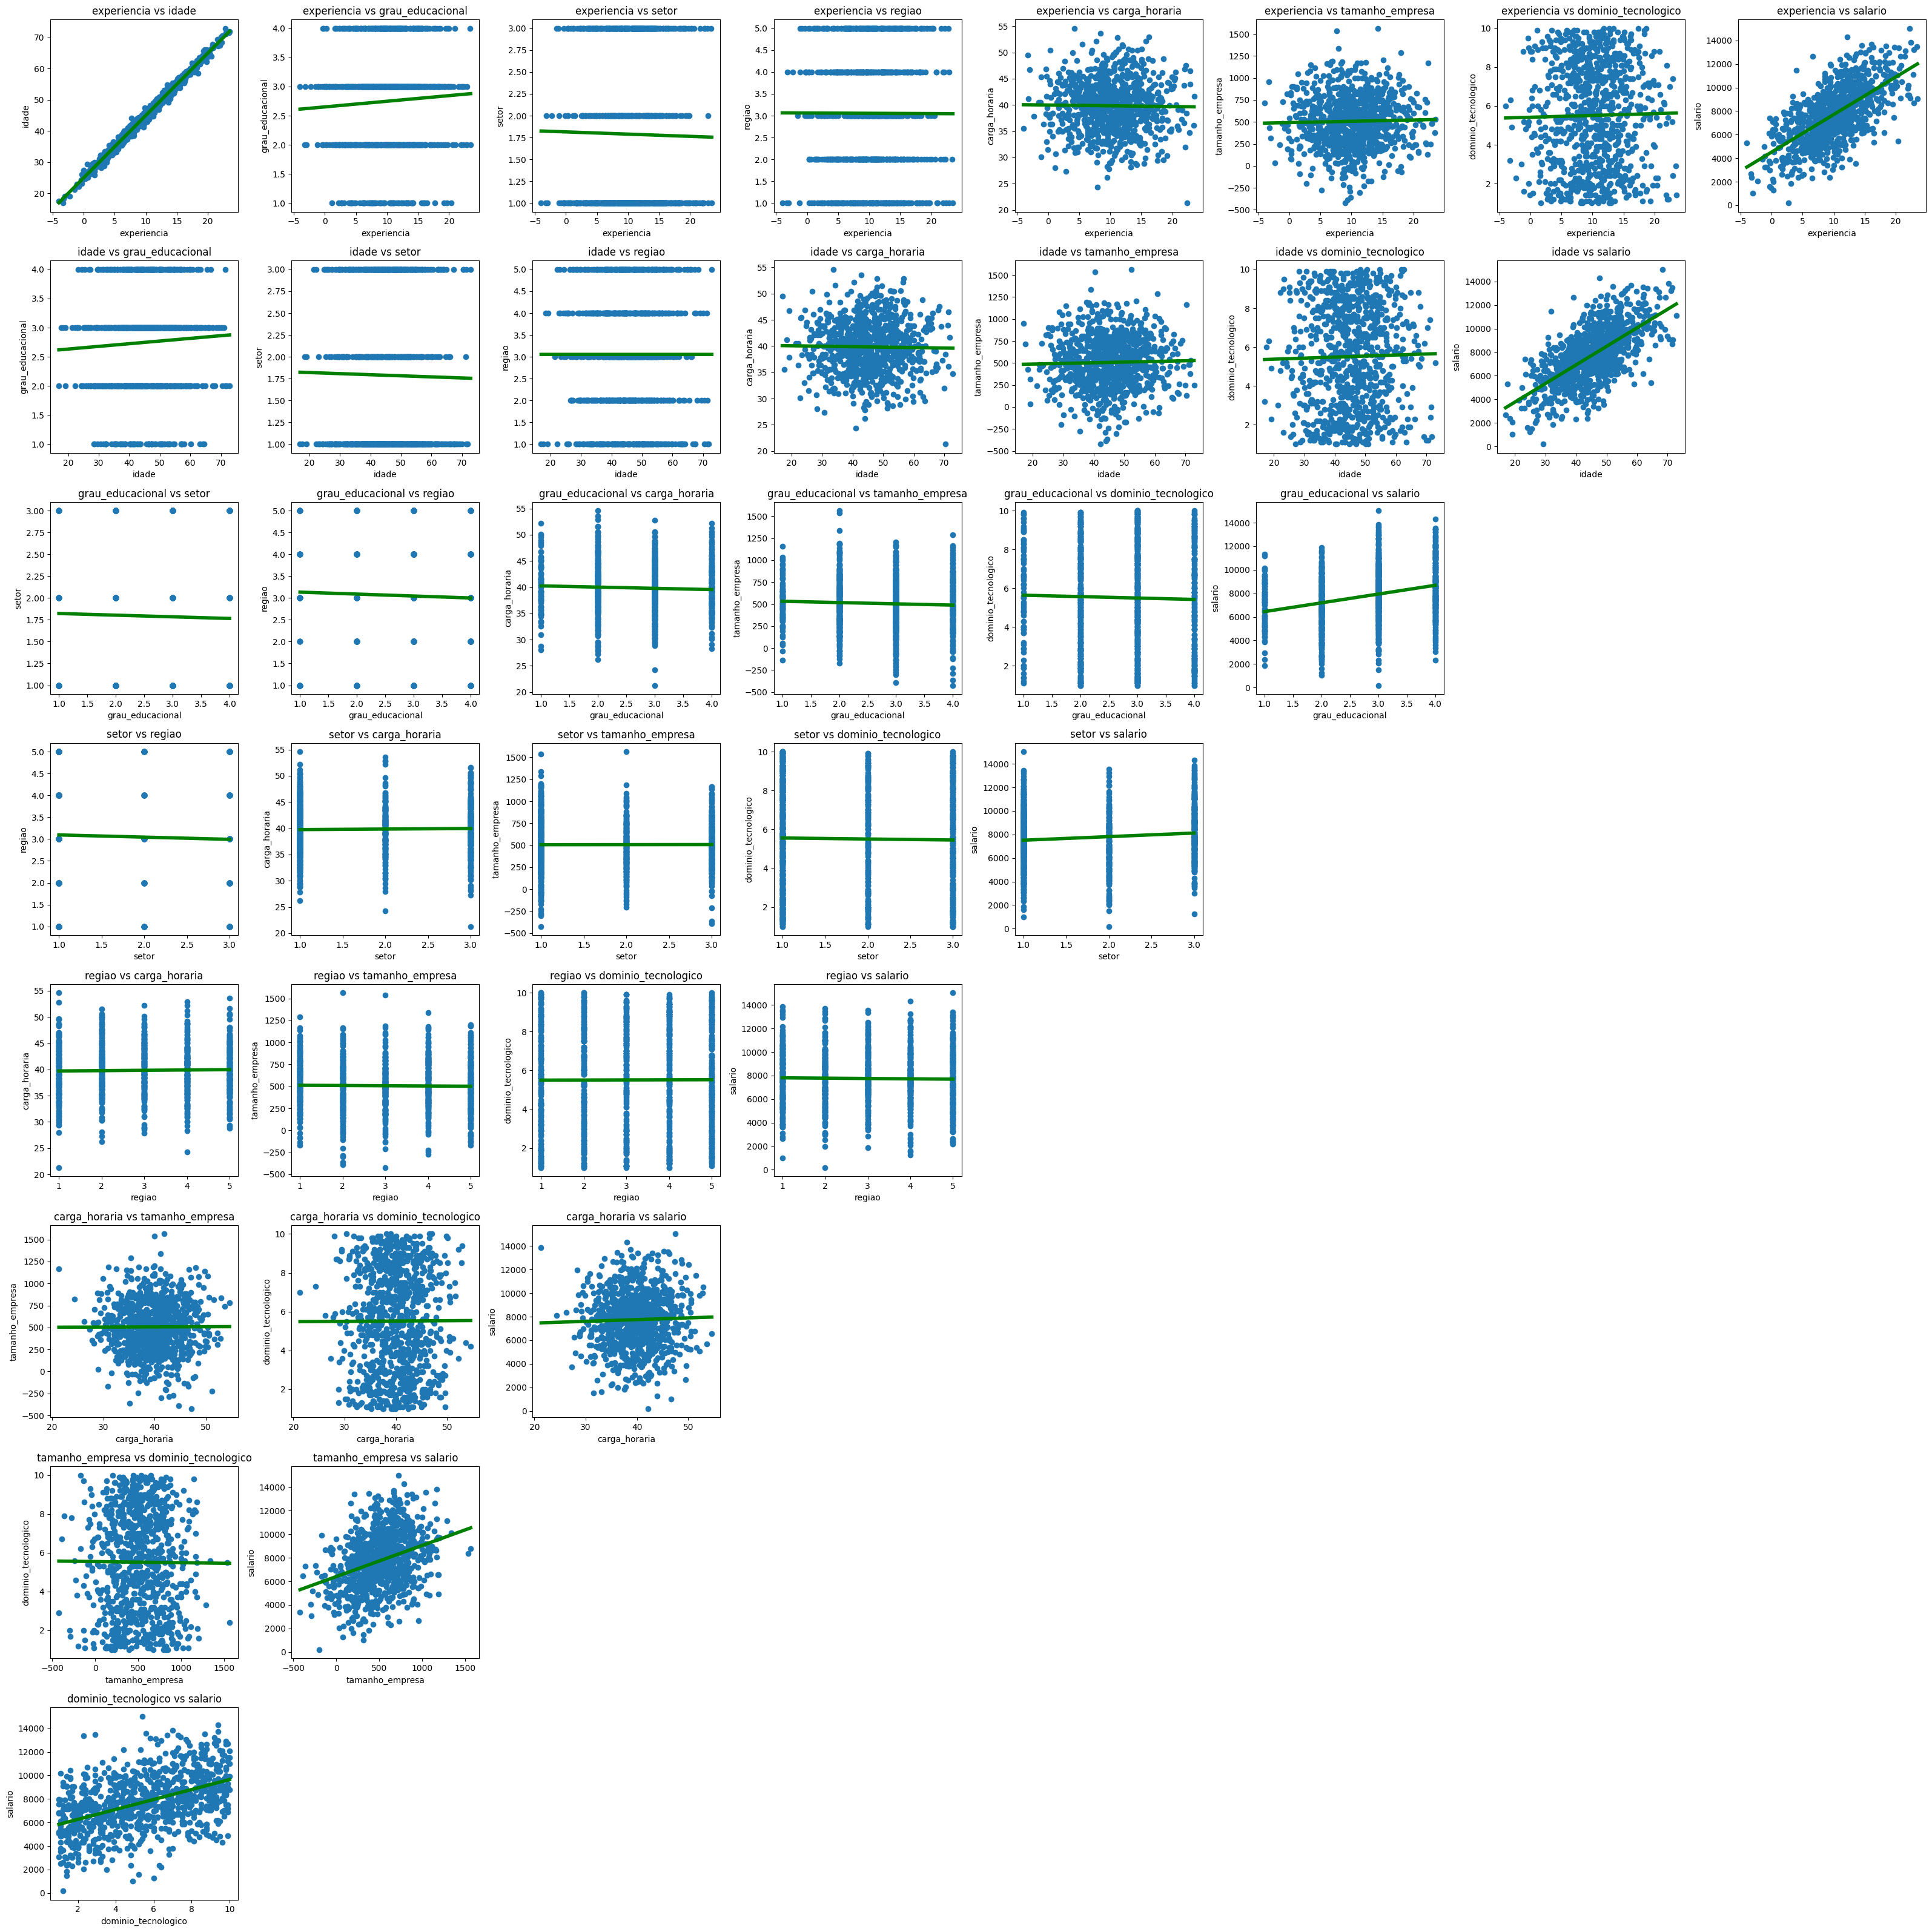

In [ ]:
# modelo.plot_correlacao_em_pares(show_model=True)

In [10]:
modelo.sumario_em_pares()

Coeficiente,Estimativa,Erro padrão,T,p-valor
salario (Intercept),-797.283443,929.224686,-0.858009,0.391
experiencia,444.446593,68.548522,6.483679,0.000
idade,-69.881857,34.184298,-2.044268,0.041
grau_educacional,732.765869,39.346667,18.623327,0.000
setor,361.452705,39.363137,9.182518,0.000
regiao,-1.760733,24.330212,-0.072368,0.942
carga_horaria,21.940169,7.074064,3.101494,0.002
tamanho_empresa,2.634208,0.117511,22.416716,0.000
dominio_tecnologico,423.617922,13.011872,32.556264,0.000




Erro padrão residual: 1041.9478201332984 com gl=904.0

R2: 0.8148117573666127 -|- R2-ajustado: 0.8131729233610075
F: 497.1899256299081 com gl = 8 e 904.0
